# Exploratory Data Analysis for Customer Reviews of British Airways

In [2]:
# Imports Pandas library for data manipulation
import pandas as pd

# Imports NumPy library for numerical computing
import numpy as np

# Imports the 'os' module for interacting with the operating system
import os

# Imports Matplotlib library for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Imports Seaborn library for statistical data visualization
import seaborn as sns

# Imports Plotly Express, a high-level interface for creating interactive plots
import plotly.express as px

# Imports the 'datetime' module for manipulating dates and times
import datetime as dt

# Imports WordCloud library for creating word clouds from text
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Reads data from a CSV file named "cleaned_data.csv" into a Pandas DataFrame.
# Assumes that the CSV file is located in the same directory as the Python script or notebook.
# If the file is located in a different directory, the full path to the file needs to be specified.
df = pd.read_csv("cleaned_data.csv")

In [4]:
df

Reviews  Stars        Date  \
0     Not Verified | I did not actually get to fly w...    5.0  2024-02-05   
1     ✅ Trip Verified | We had possibly the worse ch...    1.0  2024-02-02   
2     ✅ Trip Verified |  I flew to LHR from ATH in C...    6.0  2024-01-30   
3     ✅ Trip Verified |  I like the British Airways ...    9.0  2024-01-29   
4     ✅ Trip Verified |  I have come to boarding and...    8.0  2024-01-28   
...                                                 ...    ...         ...   
3489  LHR-PHL on a 787 Dreamliner seat 3K. I recomme...    1.0  2014-09-06   
3490  Travelled with BA from Rome to LHR. Staff at R...    8.0  2014-09-06   
3491  London to Budapest on Club World-now I don't e...    2.0  2014-09-06   
3492  We flew Premium Economy on BA from Boston to L...    8.0  2014-09-06   
3493  This was the first long-haul flight I'd taken ...    5.0  2014-09-06   

             Country  Verified  \
0     United Kingdom     False   
1     United Kingdom      True   
2              Japan      True   
3     United Kingdom      True   
4            Ukraine      True   
...              ...       ...   
3489  United Kingdom     False   
3490  United Kingdom     False   
3491       Australia     False   
3492   United States     False   
3493  United Kingdom     False   

                                            New_reviews  
0     verified actually get fly ba cancelled flight ...  
1     possibly worse check experience ever ever took...  
2     flew lhr ath club europe ba dec transfer jal f...  
3     like british airway world traveller plus produ...  
4     come boarding cabin luggage taken plane full a...  
...                                                 ...  
3489  lhr phl dreamliner seat k recommend seat k k g...  
3490  travelled ba rome lhr staff rome wonderful con...  
3491  london budapest club world even mention fact l...  
3492  flew premium economy ba boston london london j...  
3493  first long haul flight taken year high hope lo...  

[3494 rows x 6 columns]

## Average Star Rating for British Airways

In [5]:
# Calculates the mean of the 'Stars' column in the DataFrame df.
# This computes the average value of the 'Stars' column.
mean = df['Stars'].mean()
print("The Average star rating for British Airways is ",mean)

The Average star rating for British Airways is  4.629364625071552


## Percentage Distribution of Ratings

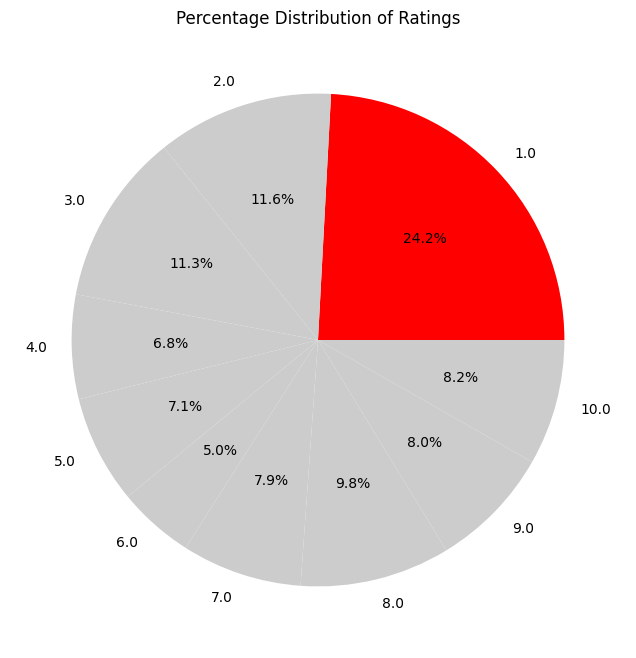

In [18]:
# Calculates the count of each unique value in the 'Stars' column of the DataFrame df.
# This provides the frequency distribution of ratings.
ratings_counts = df['Stars'].value_counts()

# Sort the ratings_counts Series by index (ratings) in ascending order
ratings_counts_sorted = ratings_counts.sort_index()

# Define the custom color palette
custom_palette = ['#FF0000', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#CCCCCC','#CCCCCC','#CCCCCC','#CCCCCC','#CCCCCC']

# Plotting a pie chart to visualize the percentage distribution of ratings.
plt.figure(figsize=(8, 8))  # Sets the figure size for the plot
plt.pie(ratings_counts_sorted, labels=ratings_counts_sorted.index, autopct='%1.1f%%', colors=custom_palette)  # Creates the pie chart with custom colors
plt.title('Percentage Distribution of Ratings')  # Sets the title of the plot
plt.show()  # Displays the plot


In [19]:
# Unique countries BA recieved the reviews from
print(f"{len(df.Country.unique())} unique countries")

70 unique countries


C:\Users\grahu\AppData\Local\Temp\ipykernel_29004\4193384230.py:8: UserWarning:

The palette list has more values (20) than needed (5), which may not be intended.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


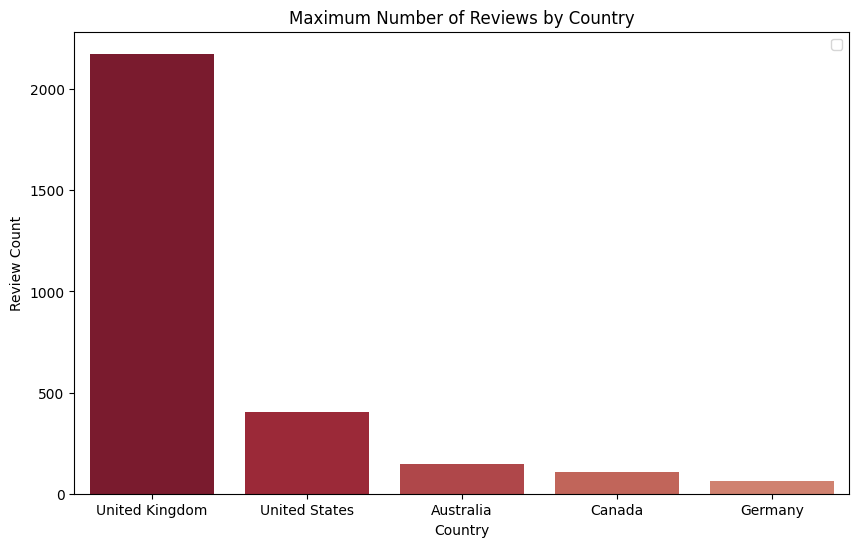

In [33]:
# Calculates the count of reviews for each unique country in the 'Country' column of the DataFrame df.
# Selects the top five countries with the highest review counts.
top_countries = df['Country'].value_counts().head(5)
## Define the custom color palette (red to blue fading)
custom_palette = sns.color_palette("RdBu", len(all_fdist))
# Plotting a bar chart to visualize the review counts for the top five countries.
plt.figure(figsize=(10, 6))  # Sets the figure size for the plot
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette= custom_palette, dodge=False)  # Creates the bar chart
plt.xlabel('Country')  # Sets the label for the x-axis
plt.ylabel('Review Count')  # Sets the label for the y-axis
plt.title('Maximum Number of Reviews by Country')  # Sets the title of the plot
plt.legend(title=None)  # Removes legend title
plt.show()  # Displays the plot

C:\Users\grahu\AppData\Local\Temp\ipykernel_29004\1526329579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings_by_country.index, y=average_ratings_by_country.values, palette="viridis")  # Creates the bar chart


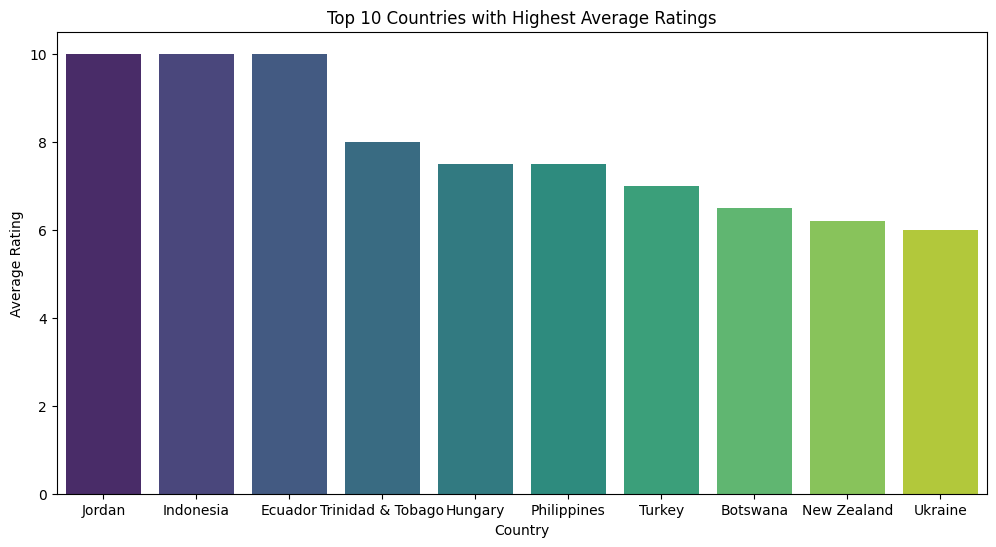

In [21]:
# Calculates the average rating for each country by grouping the DataFrame df by the 'Country' column
# and computing the mean of the 'Stars' column. It then selects the top 10 countries with the highest average ratings.
average_ratings_by_country = df.groupby('Country')['Stars'].mean().sort_values(ascending=False).head(10)

# Plotting a bar chart to visualize the average ratings for the top 10 countries.
plt.figure(figsize=(12, 6))  # Sets the figure size for the plot
sns.barplot(x=average_ratings_by_country.index, y=average_ratings_by_country.values, palette="viridis")  # Creates the bar chart
plt.xlabel('Country')  # Sets the label for the x-axis
plt.ylabel('Average Rating')  # Sets the label for the y-axis
plt.title('Top 10 Countries with Highest Average Ratings')  # Sets the title of the plot
plt.show()  # Displays the plot

In [22]:
# Converts the 'Date' column in the DataFrame df to datetime datatype.
df['Date'] = pd.to_datetime(df['Date'])

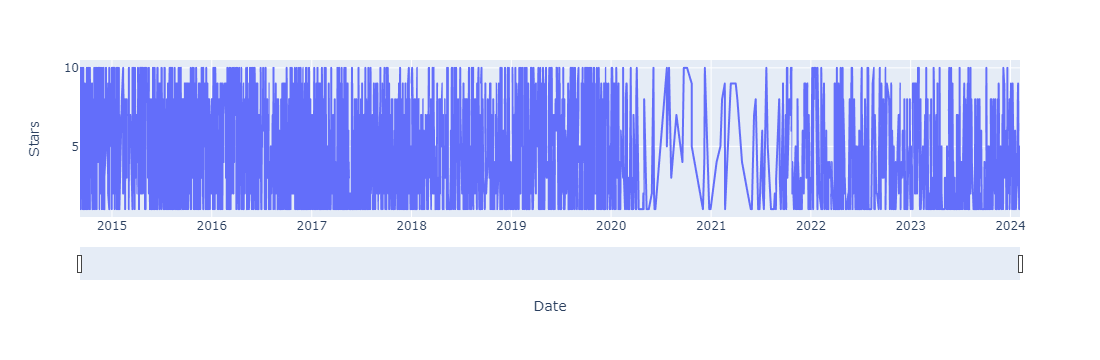

In [23]:
# Creates a line plot using Plotly Express, with the 'Date' column as the x-axis and the 'Stars' column as the y-axis.
fig = px.line(df, x='Date', y="Stars")

# Displays a range slider for the x-axis to enable zooming and panning.
fig.update_xaxes(rangeslider_visible=True)

# Shows the plot.
fig.show()


There is nothing much to infer from the plot above becasue all the dates are the dates that the reviews are posted into the website and not the actual flight date.

## Wordcloud

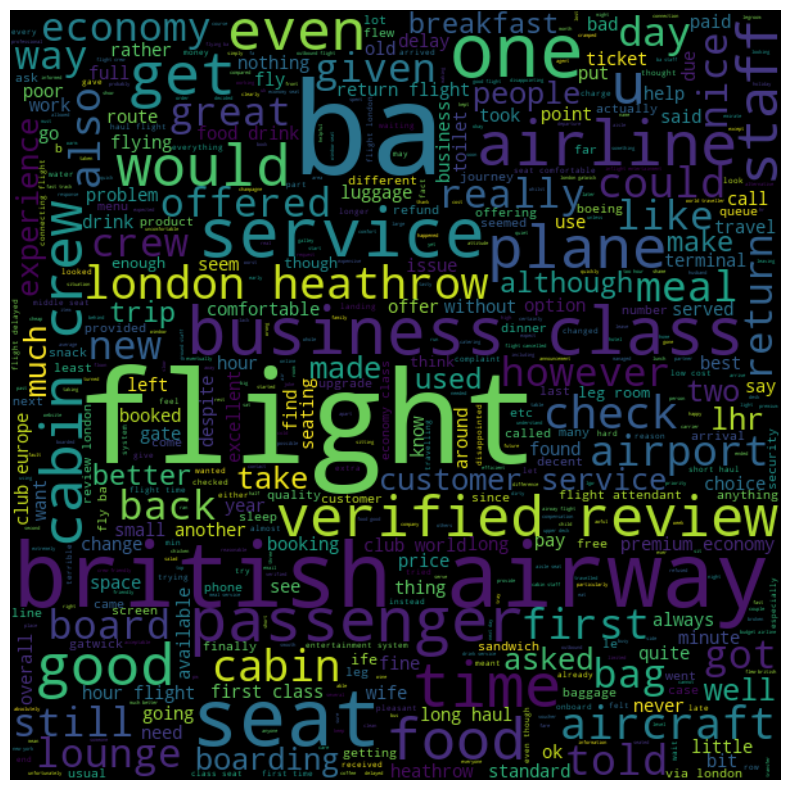

In [24]:
# Imports the Natural Language Toolkit (nltk) library
import nltk
# Imports the stopwords corpus from nltk
from nltk.corpus import stopwords

# Concatenates all the reviews into a single string
reviews = " ".join(df.New_reviews)

# Sets the stopwords for English language
stopwords = set(stopwords.words('english'))

# Creates a WordCloud object with specified parameters and generates the word cloud image
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Displays the generated word cloud image
plt.figure(figsize=(20, 10))  # Sets the figure size for the plot
plt.imshow(wordcloud, interpolation='bilinear')  # Displays the word cloud image
plt.axis("off")  # Hides the axis
plt.show()  # Shows the plot

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list

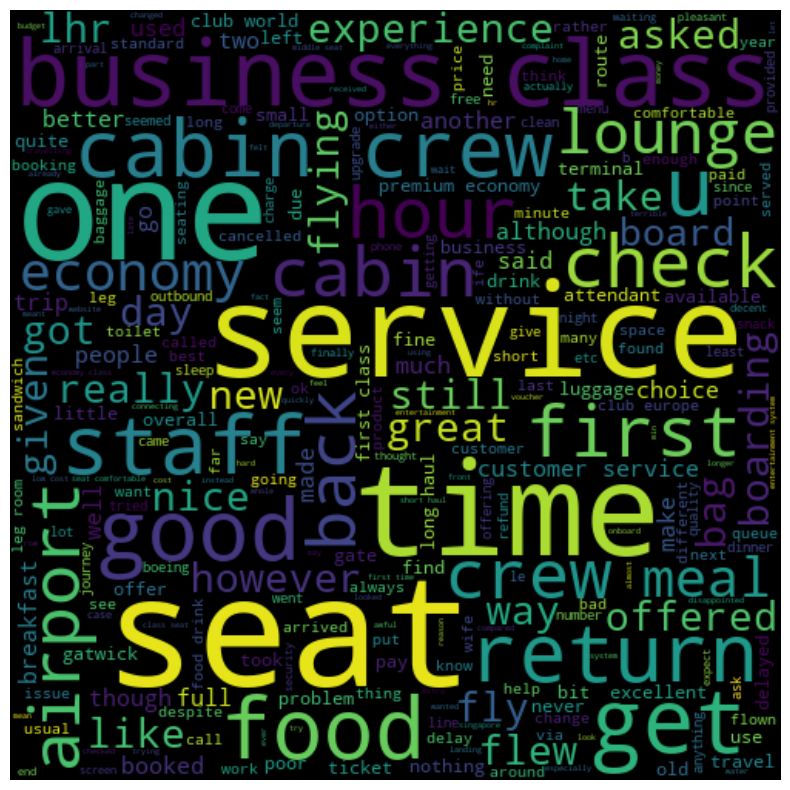

In [28]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenating all the reviews into a single string
reviews = " ".join(df.New_reviews)

# Setting up the figure size for the word cloud plot
plt.figure(figsize=(20, 10))

# Setting stopwords for English language and adding additional custom stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(["ba", "flight", "british", "airway", "airline", "plane", "told", "also", "passenger",
                  "london", "heathrow", "aircraft", "could", "even", "would", "verified", "review"])

# Creating and generating a word cloud image
wordcloud = WordCloud(height=500, width=500, max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Displaying the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequency

In [29]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(["ba", "flight", "british", "airway", "airline", "plane", "told", "also", "passenger",
                  "london", "heathrow", "aircraft", "could", "even", "would", "verified", "review","1hr"])

new_words = [word for word in words if word not in stopwords]

# Calculate the frequencies of each word
nlp_words = FreqDist(new_words).most_common(20)

# Create a DataFrame of these words and their frequencies
all_fdist = pd.Series(dict(nlp_words))

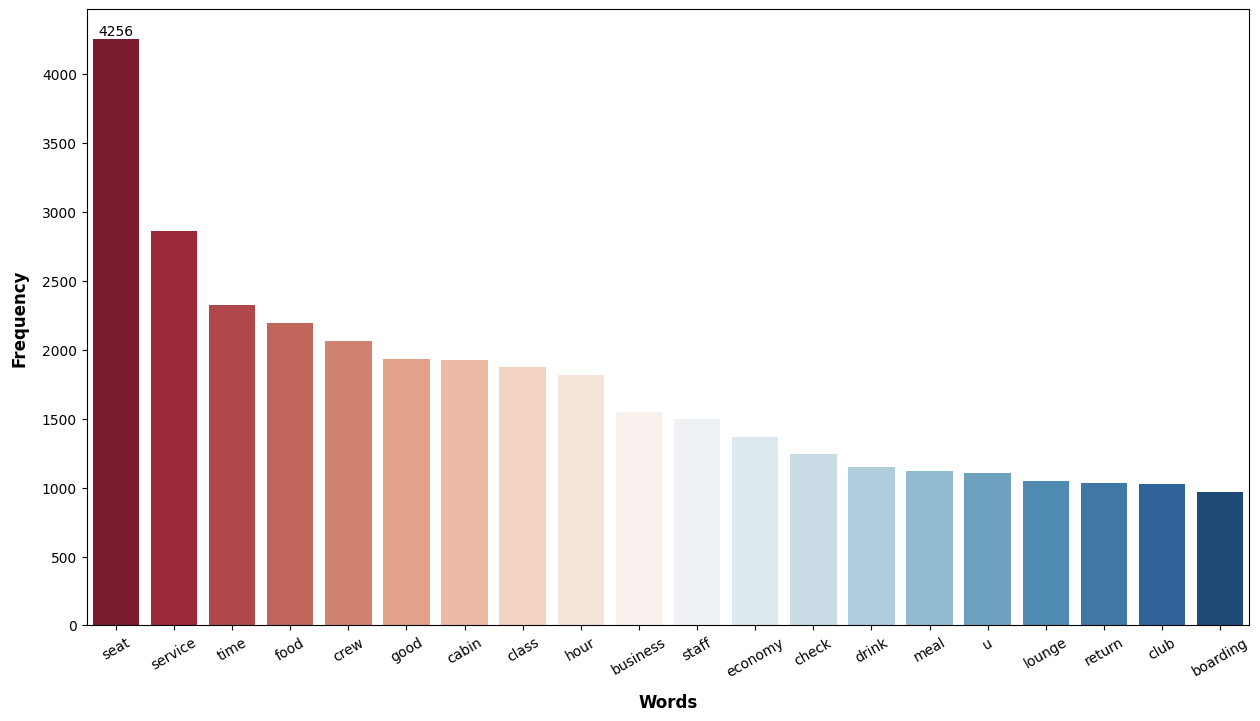

In [32]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Define the custom color palette (red to blue fading)
custom_palette = sns.color_palette("RdBu", len(all_fdist))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, hue=all_fdist.index, ax=ax, palette=custom_palette, legend=False)

# Adding labels to the bars
all_plot.bar_label(all_plot.containers[0])

# Setting x-axis label with rotation for ease of viewing
plt.xlabel('Words', fontsize=12, labelpad=10, weight='bold')
plt.xticks(rotation=30)

# Setting y-axis label
plt.ylabel('Frequency', fontsize=12, labelpad=10, weight='bold')

plt.show()

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service", "Time", "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

## Word Frequency with N-gram

<Axes: >

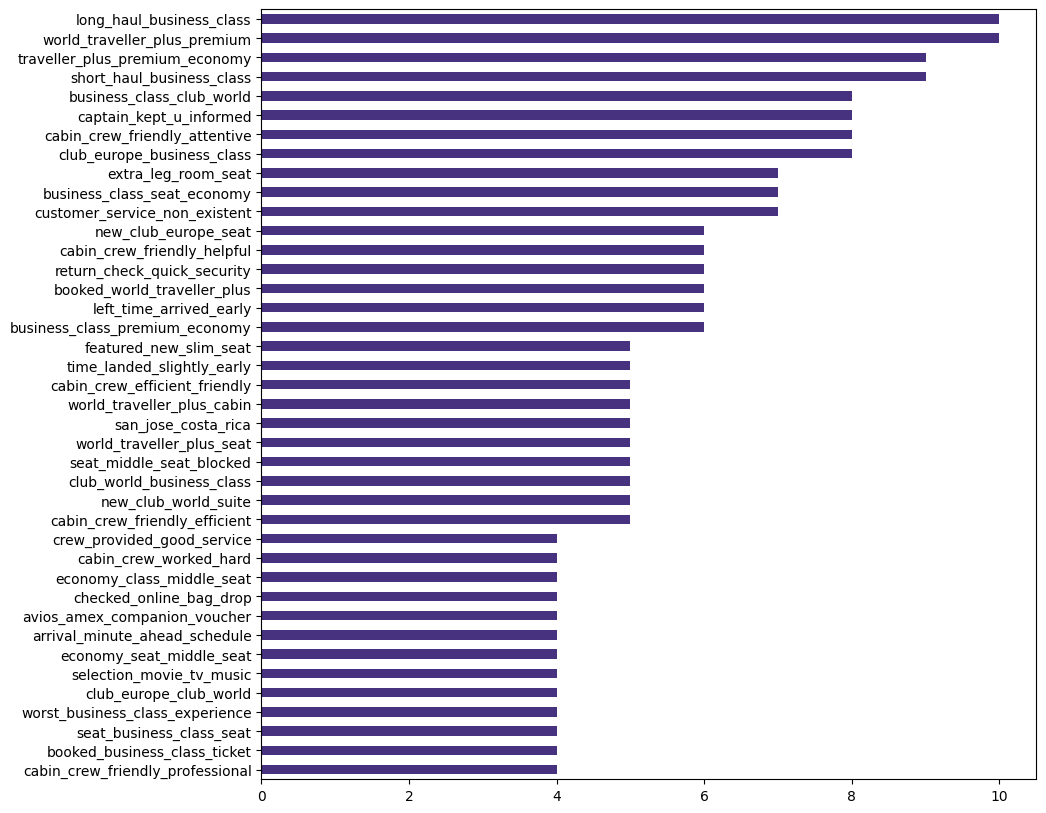

In [34]:
## Imports
import nltk
import pandas as pd
from nltk import FreqDist
import matplotlib.pyplot as plt

# Concatenate all the reviews into a single string
reviews = " ".join(df.New_reviews)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Define and use the stopwords set
new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    from nltk import ngrams

    # Generate n-grams
    n_grams = ngrams(new_words, number_of_ngrams)

    # Create FreqDist
    ngram_fd = FreqDist(n_grams).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Join n-gram tokens with '_' and maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


# Call the function to generate and plot the n-grams frequency distribution
get_freq_dist(new_words, 4)

<Axes: >

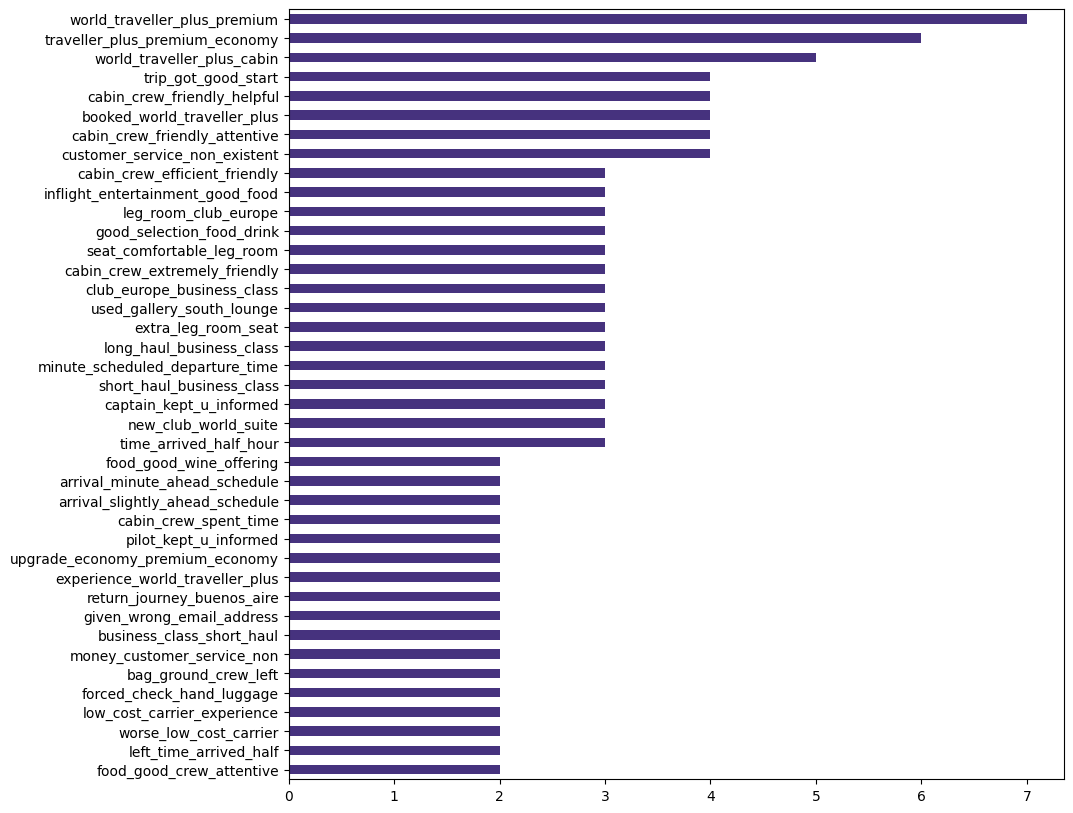

In [35]:
ratings_1_3 = df[df.Stars.isin([1,2,3])]
ratings_4_6 = df[df.Stars.isin([4,5,6])]
ratings_7_10 = df[df.Stars.isin([7,8,9,10])]
reviews_1_3 = " ".join(ratings_1_3.New_reviews)
reviews_4_6 = " ".join(ratings_4_6.New_reviews)
reviews_7_10 = " ".join(ratings_7_10.New_reviews)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

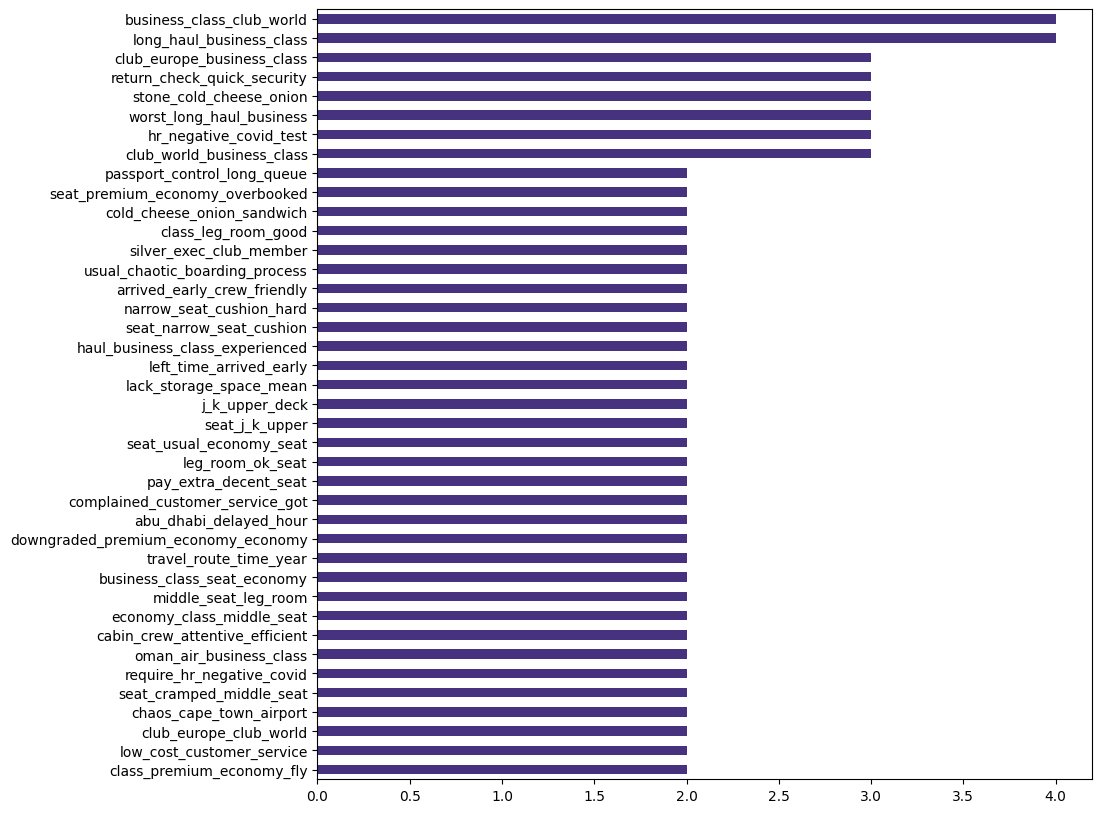

In [36]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

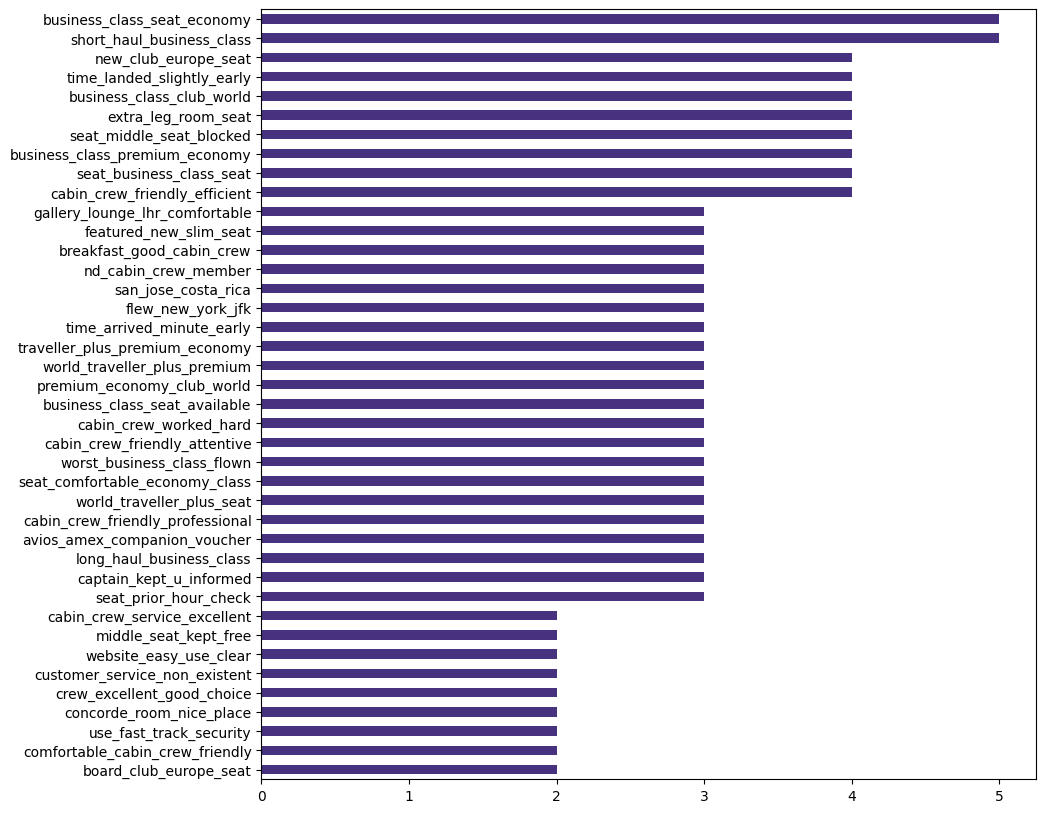

In [37]:
new_words = [word for word in words_1_3 if word not in stopwords]
get_freq_dist(new_words,4)

## Textblob library - Whether the text is negative or Positive

In [38]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.New_reviews)):
    sent= TextBlob(df.New_reviews[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [39]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2381 number of reviews between -0.2 and 0.2 polarity score
1390 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2381 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

## VADER Algorithm

In [40]:
%%capture
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.New_reviews)):
    
    score = vds.polarity_scores(df.New_reviews[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [41]:
df.label.value_counts()

label
 1    2207
-1    1167
 0     120
Name: count, dtype: int64